In [114]:
#import platform
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline

In [115]:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [116]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [117]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [118]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Basic Data Cleaning
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [119]:
df['TotalCharges'].dtype

dtype('O')

In [120]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [121]:
df['TotalCharges'].dtype

dtype('float64')

In [122]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [123]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000



# Feature distribution
We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

# Numerical features distribution
Numeric summarizing techniques (mean, standard deviation, etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [124]:
numerical_features=['tenure','MonthlyCharges','TotalCharges']

In [125]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

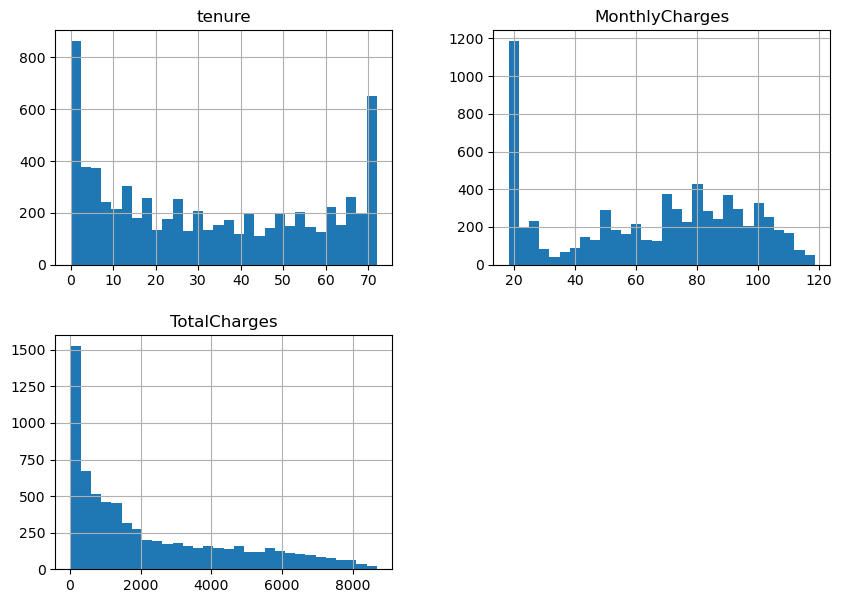

In [126]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

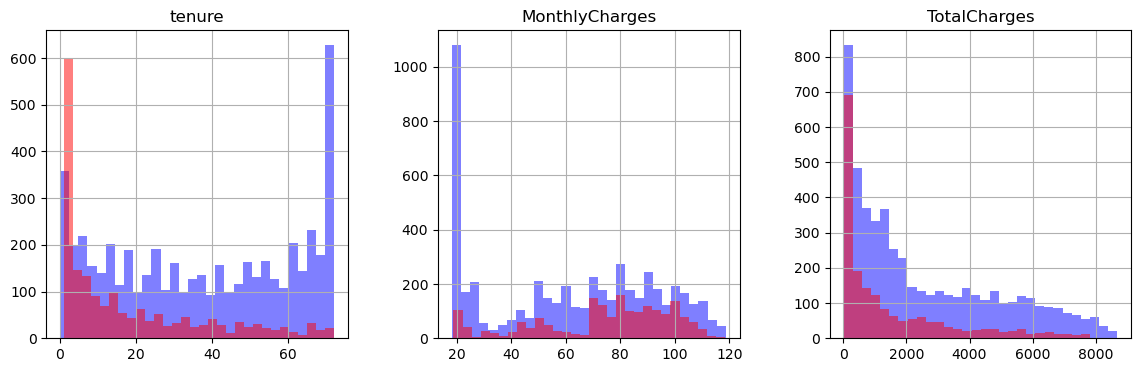

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

# Categorical feature distribution
To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

In [128]:
categorical_features=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']


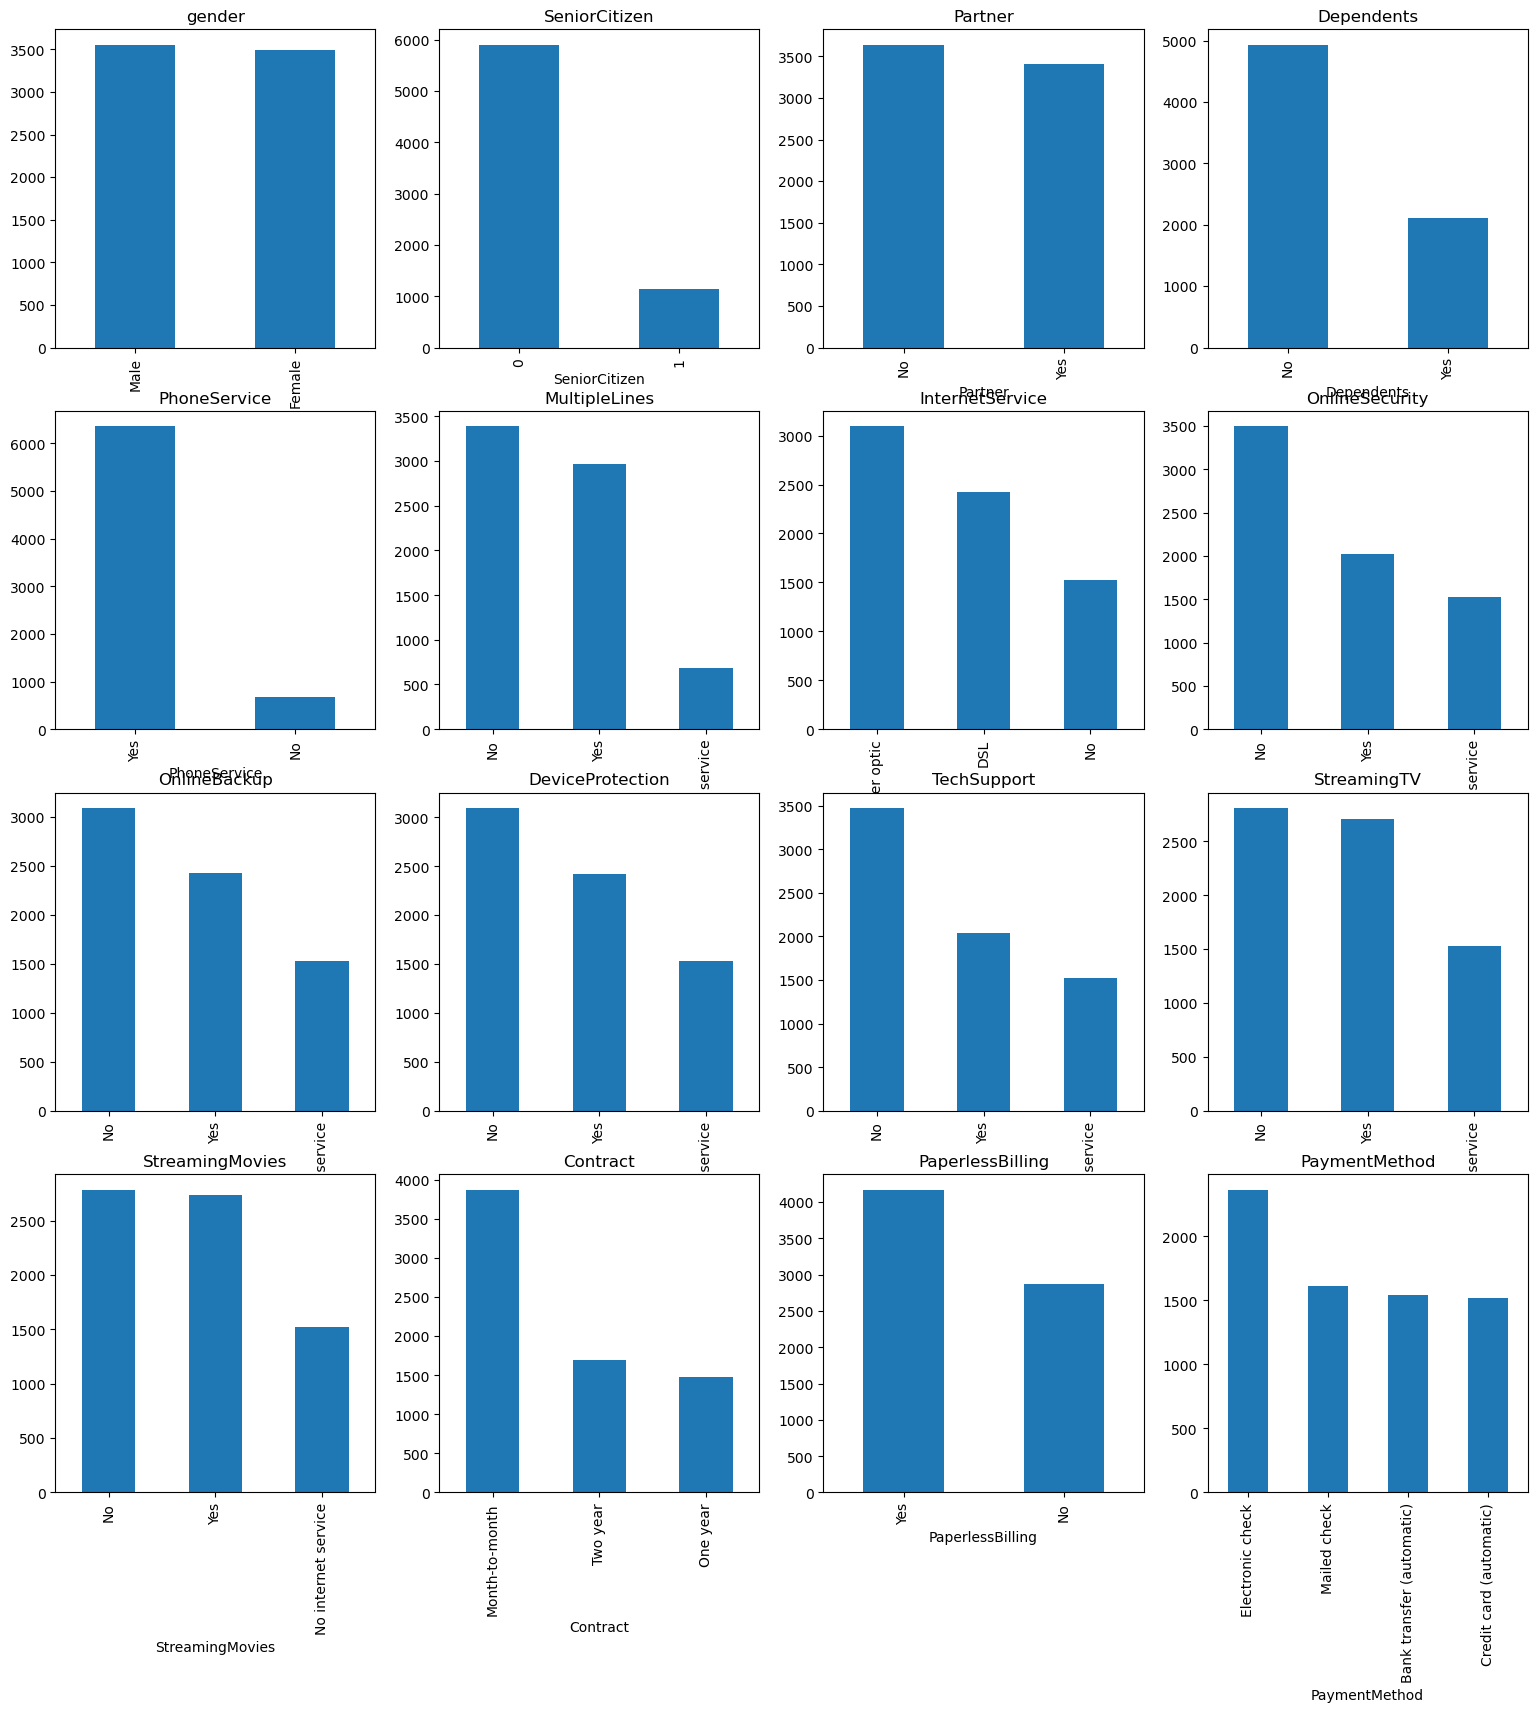

In [129]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

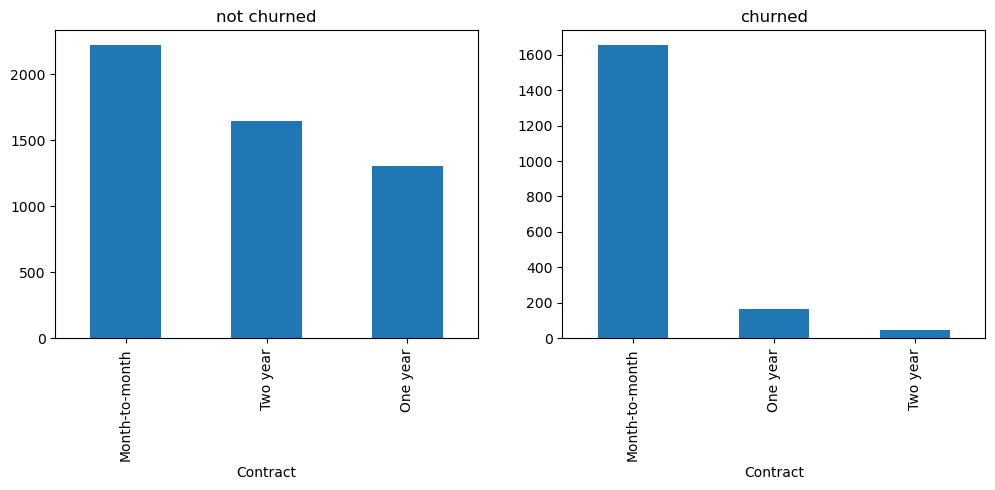

In [130]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')




# Target variable distribution

Text(0.5, 1.0, 'churned')

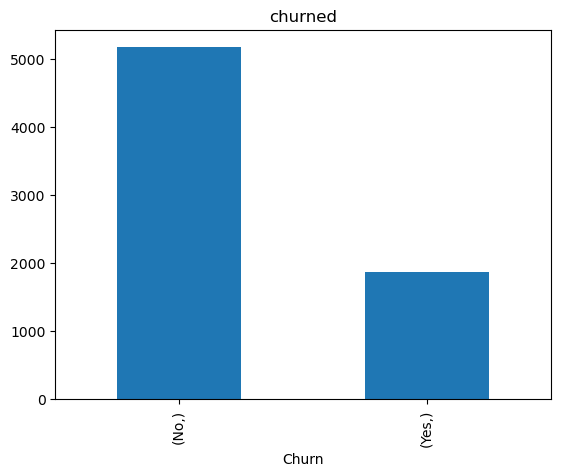

In [131]:
target=["Churn"]
df[target].value_counts().plot(kind='bar').set_title('churned')


Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as compare to churned users. The model would achieve high accuracy as it would mostly predict majority class - users who didn't churn in our example.

Few things we can do to minimize the influence of imbalanced dataset:

resample data,
collect more samples,
use precision and recall as accuracy metrics.

# Cleaning and transforming data

In [132]:
#Dropped customerID because it is not needed
df.drop(['customerID'],axis = 1,inplace = True)

In [133]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
df.shape

(7043, 20)


# On Hot Encoding

In [135]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [136]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [137]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

# Rearranging Columns

In [138]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [139]:

df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [140]:
df1.shape

(7043, 31)

# replacing missing values

In [141]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))


# Feature Scaling

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [143]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))


# Feature Selection

In [144]:
from sklearn.model_selection import GridSearchCV, train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [145]:
# Apply SMOTE to the training data for data imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# LOGISTIC REGRESSION
a. ordinary

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)
# Predict on the test set
Y_pred = lr_model.predict(X_test)
roc_auc = roc_auc_score(Y_test, Y_pred)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Classification Report:\n', classification_report(Y_test, Y_pred))
print('ROC-AUC Score:', roc_auc)


Accuracy: 0.8211497515968772
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

ROC-AUC Score: 0.7488419576221185


b.using xgboost

In [147]:
# : ! pip install xgboost      ( do this when xboost not installed before)

b. xgboost

In [148]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)

X_train_transformed = xgb_model.apply(X_train)
X_test_transformed = xgb_model.apply(X_test)

# Flatten the transformed data if it is not in 2D
X_train_transformed = X_train_transformed.reshape(-1, X_train_transformed.shape[-1])
X_test_transformed = X_test_transformed.reshape(-1, X_test_transformed.shape[-1])

# Step 2: Train an SVC model on the transformed features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

lr_model_xg = LogisticRegression(max_iter=1000)
lr_model_xg.fit(X_train, Y_train)
# Predict on the test set
Y_pred_xg= lr_model_xg.predict(X_test)
roc_auc_lr = roc_auc_score(Y_test, Y_pred_xg)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_xg))
print('Classification Report:\n', classification_report(Y_test, Y_pred_xg))
print('ROC-AUC Score:', roc_auc)


Accuracy: 0.8211497515968772
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

ROC-AUC Score: 0.7488419576221185


# support vector classifier
a. ordinary

In [150]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

svc_model = SVC(kernel='rbf', C=1, gamma='auto')
svc_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_svc = svc_model.predict(X_test)
roc_auc_svc = roc_auc_score(Y_test, Y_pred_svc)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_svc))
print('Classification Report:\n', classification_report(Y_test, Y_pred_svc))
print('ROC-AUC Score:', roc_auc_svc)



Accuracy: 0.8133427963094393
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.91      0.88      1036
        True       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.81      1409

ROC-AUC Score: 0.7238023642179139


b. xgboost

In [151]:
from sklearn.metrics import roc_auc_score, roc_curve
svc_model_xg = SVC(kernel='rbf', C=1, gamma='auto')
svc_model_xg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_svc_xg = svc_model_xg.predict(X_test_scaled)
roc_auc_svc_xg = roc_auc_score(Y_test, Y_pred_svc_xg)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Classification Report:\n', classification_report(Y_test, Y_pred))
print('ROC-AUC Score:', roc_auc_svc_xg)

Accuracy: 0.8211497515968772
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

ROC-AUC Score: 0.6795133892989121


# decision tree classifier
a. ordinary

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_dtc = dt_model.predict(X_test)
roc_auc_dtc = roc_auc_score(Y_test, Y_pred_dtc)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_dtc))
print('Classification Report:\n', classification_report(Y_test, Y_pred_dtc))
print('ROC-AUC Score:', roc_auc_dtc)


Accuracy: 0.7068843151171044
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.80      0.80      1036
        True       0.45      0.45      0.45       373

    accuracy                           0.71      1409
   macro avg       0.62      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

ROC-AUC Score: 0.6256728290910597


B. XGBOOST

In [153]:
from sklearn.metrics import roc_auc_score, roc_curve

dt_model_xg = DecisionTreeClassifier(random_state=42)
dt_model_xg.fit(X_train_transformed, Y_train)

# Predict on the test set
Y_pred_dt_xg = dt_model_xg.predict(X_test_transformed)
roc_auc_dt_xg = roc_auc_score(Y_test, Y_pred_dt_xg)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_dt_xg))
print('Classification Report:\n', classification_report(Y_test, Y_pred_dt_xg))
print('ROC-AUC Score:', roc_auc_dt_xg)


Accuracy: 0.7366926898509581
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.83      0.82      1036
        True       0.50      0.49      0.49       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.74      0.74      1409

ROC-AUC Score: 0.6562373844545427


# knn
a. ordinary

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)

# Predict on the test set
Y_pred_knn = knn_model.predict(X_test)
roc_auc_knn = roc_auc_score(Y_test, Y_pred_knn)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_knn))
print('Classification Report:\n', classification_report(Y_test, Y_pred_knn))
print('ROC-AUC Score:', roc_auc_knn)


Accuracy: 0.7700496806245565
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.86      0.85      1036
        True       0.57      0.52      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.77      1409

ROC-AUC Score: 0.6892150672311531


B. XGBOOST

In [155]:
from sklearn.metrics import roc_auc_score, roc_curve
knn_model_xg = KNeighborsClassifier(n_neighbors=5)
knn_model_xg.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_knn_xg = knn_model_xg.predict(X_test_scaled)
roc_auc_knn_xg = roc_auc_score(Y_test, Y_pred_knn)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_knn_xg))
print('Classification Report:\n', classification_report(Y_test, Y_pred_knn_xg))
print('ROC-AUC Score:', roc_auc_knn_xg)

Accuracy: 0.7721788502484032
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.87      0.85      1036
        True       0.58      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.77      1409

ROC-AUC Score: 0.6892150672311531


# random forest
a. ordinary

In [156]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,Y_train)

# Predict on the test set
Y_pred_rf = rf_model.predict(X_test)
roc_auc_rf = roc_auc_score(Y_test, Y_pred_rf)


# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_rf))
print('Classification Report:\n', classification_report(Y_test, Y_pred_rf))
print('ROC-AUC Score:', roc_auc_rf)

Accuracy: 0.7927608232789212
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.6883597979442483


B. USING XGBOOST

In [157]:
from sklearn.metrics import roc_auc_score, roc_curve
rf_model_xg = RandomForestClassifier(random_state=42)
rf_model_xg.fit(X_train_transformed, Y_train)

# Predict on the test set
Y_pred_rf_xg = rf_model_xg.predict(X_test_transformed)
roc_auc_rf_xg = roc_auc_score(Y_test, Y_pred_rf_xg)

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test, Y_pred_rf_xg))
print('Classification Report:\n', classification_report(Y_test, Y_pred_rf_xg))
print('ROC-AUC Score:', roc_auc_rf_xg)

Accuracy: 0.7856635911994322
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.64      0.44      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409

ROC-AUC Score: 0.674954972206983


# pickle

In [158]:
import pickle
filename="lr_xg_model.sav"
pickle.dump(lr_model_xg,open(filename,"wb"))


In [159]:
load_rf_xg_model=pickle.load(open(filename,'rb'))

In [160]:
ans=load_rf_xg_model.predict([[0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,]])

In [161]:
ans

array([False])

Male	0	No	No	2	Yes	No	DSL	Yes	Yes	No	No	No	No	Month-to-month	Yes	Mailed check	53.85	108.15	Yes

Female	0	Yes	No	1	No	No phone service	DSL	No	Yes	No	No	No	No	Month-to-month	Yes	Electronic check	29.85	29.85	No

1.Random forest:
Accuracy: 0.7856635911994322
ROC-AUC Score: 0.674954972206983

2.knn:
Accuracy: 0.7721788502484032
ROC-AUC Score: 0.6892150672311531


3.decision tree:
Accuracy: 0.7366926898509581
ROC-AUC Score: 0.6562373844545427

4.support vector classifier:
Accuracy: 0.8211497515968772
ROC-AUC Score: 0.6795133892989121

5.logistic regression:
Accuracy: 0.8211497515968772
ROC-AUC Score: 0.7488419576221185



so final model taken as lr with xgboost